In [315]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy.random import RandomState
import pandas as pd
import csv
import urllib
from matplotlib import style
from scipy import stats
from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [316]:

#url = 'F:/house_data_complete.csv'
df = pd.read_csv(r"F:/house_data_complete.csv").dropna()
#df = pd.read_csv(url)
data = df.to_numpy
data2=df.drop(['id','date','sqft_lot','bathrooms','sqft_living','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long','sqft_living15','sqft_lot15','yr_renovated'], axis=1)


train, CV, test = np.split(df.sample(frac=1),[int(.6*len(df)),int(.8*len(df))])
# m= train.values[:,2].size
# r=test.values[:, 2].size
# w=CV.values[:, 2].size
print (train)
print (CV)
print (test)



               id             date      price  bedrooms  bathrooms  \
17004  6819100080  20141001T000000   636100.0         3       1.00   
75     3276920270  20141105T000000   832500.0         4       4.00   
14724  2310040230  20140520T000000   350000.0         4       2.25   
15955  7151700190  20150331T000000   850000.0         2       1.50   
21083  1442880380  20140730T000000   439990.0         3       2.50   
10376   114101505  20150423T000000   630000.0         5       3.50   
15896  2131701410  20150427T000000   299950.0         3       2.25   
3570   9460000110  20140924T000000   280000.0         3       1.75   
12396   824059293  20141028T000000   943500.0         3       2.25   
18297   546000245  20140716T000000   549900.0         3       1.50   
20832  2114700374  20150413T000000   357500.0         3       3.00   
13062  5249803036  20140714T000000   380000.0         3       1.00   
11564  1558100398  20140515T000000   350000.0         3       1.75   
16264  7889600285  2

Text(0.5,0,'Bedrooms')

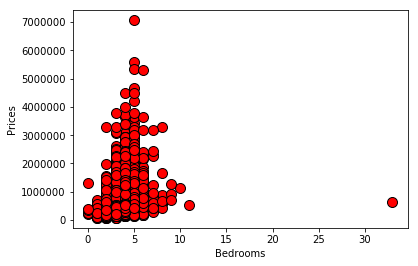

In [317]:
pyplot.plot(train.values[:,3], train.values[:,2], 'ro', ms=10, mec='k')
pyplot.ylabel('Prices')
pyplot.xlabel('Bedrooms')

#fig = plt.figure()
#pyplot.plot(train,'ro',ms=10,mec='k') 
#pyplot.title("Training Data", fontsize = 24)
#pyplot.xlabel('Price',fontsize = 16)
#pyplot.ylabel("Bedrooms", fontsize = 16)
#plt.tick_params(axis = 'both', which = 'major' , labelsize = 16)
#plt.show()


Text(0.5,0,'Bedrooms')

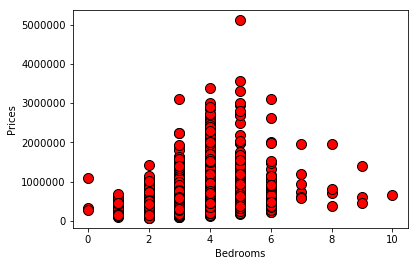

In [318]:
#ax = CV.plot(title='Cross Validation Data')
#ax.set_ylabel('Price')
#ax.set_xlabel('Area')

#fig = plt.figure()
#pyplot.plot(CV,'ro',ms=10,mec='k') 
#pyplot.title("Cross Validation Data", fontsize = 24)
#pyplot.xlabel('Price',fontsize = 16)
#pyplot.ylabel("Bedrooms", fontsize = 16)
#plt.tick_params(axis = 'both', which = 'major' , labelsize = 16)
#plt.show()

pyplot.plot(CV.values[:,3], CV.values[:,2], 'ro', ms=10, mec='k')
pyplot.ylabel('Prices')
pyplot.xlabel('Bedrooms')


Text(0.5,0,'Bedrooms')

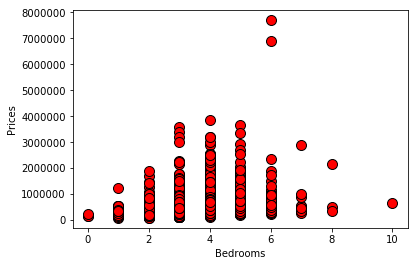

In [319]:
#ax = test.plot(title='Testing Data')
#ax.set_ylabel('Price')
#ax.set_xlabel('Area')

#fig = plt.figure()
#pyplot.plot(test,'ro',ms=10,mec='k') 
#pyplot.title("Testing Data", fontsize = 24)
#pyplot.xlabel('Price',fontsize = 16)
#pyplot.ylabel("Bedrooms", fontsize = 16)
#plt.tick_params(axis = 'both', which = 'major' , labelsize = 16)
#plt.show()

pyplot.plot(test.values[:,3], test.values[:,2], 'ro', ms=10, mec='k')
pyplot.ylabel('Prices')
pyplot.xlabel('Bedrooms')


In [320]:

m= train.values[:,2].size
mT = test.values[:,2].size
mV = CV.values[:,2].size
def featureNormalize(X):
    trainingMean = np.mean(X, axis=0)
    trainingSigma = np.std(X, axis=0)    
    trainingNorm = (X - trainingMean) / trainingSigma
    return trainingNorm, trainingMean, trainingSigma


In [321]:

df.head()
len(df)
stats.ttest_ind(train['price'],train['bedrooms'])


Ttest_indResult(statistic=167.8350774717035, pvalue=0.0)

In [322]:
test = test.drop(columns=['price', 'date']).values
test= test[:,1:6]
testingNorm, testingMean, testingSigma = featureNormalize(test)
test = np.concatenate([np.ones((mT, 1)), testingNorm], axis=1)
CV = CV.drop(columns=['price', 'date']).values
CV= CV[:,1:6]
CVNorm, CVMean, CVSigma = featureNormalize(CV)
CV = np.concatenate([np.ones((mV, 1)), CVNorm], axis=1)
X = train.drop(columns=['price', 'date']).values
X= X[:,1:6]
trainingNorm, trainingMean, trainingSigma = featureNormalize(X)


#X_norm, mu, sigma = featureNormalize(X)
print('Computed mean:', trainingMean)
print('Computed standard deviation:', trainingSigma)

print('Computed mean:', testingMean)
print('Computed standard deviation:', testingSigma)

print('Computed mean:', CVMean)
print('Computed standard deviation:', CVSigma)

#y = train["bedrooms"]
#m = y.size

#X = np.stack([np.ones(m), X], axis=1)
X = np.concatenate([np.ones((m, 1)), trainingNorm], axis=1)
theta1 = np.zeros(X.shape[1])
hyp1 = np.dot(X,theta1)
# hyp2 = np.dot(np.power(X,2) , theta1)
# hyp3 = np.dot(np.power(X,3) , theta1)

q = X.copy()
q[:, 3] = np.power(q[:, 5], 2)
# hyp3 = np.dot(k , theta1)

u = X.copy()
u[:, 4] = np.power(u[:, 3], 2)

hyp2 = np.dot(q , theta1)
hyp3 = np.dot(u , theta1)

hyp1Test = np.dot(X,theta1)
q2 = X.copy()
q2[:, 3] = np.power(q2[:, 5], 2)
hyp2Test = np.dot(q2 , theta1)    
u2 = X.copy()
u2[:, 4] = np.power(u2[:, 3], 2)
hyp3Test = np.dot(u2 , theta1)    

hyp1CV = np.dot(X,theta1)
q3 = X.copy()
q3[:, 3] = np.power(q3[:, 5], 2)
hyp2CV = np.dot(q3 , theta1)    
u3 = X.copy()
u3[:, 4] = np.power(u3[:, 3], 2)

hyp3CV = np.dot(u3 , theta1)   

y = train.values[:,2]
yT = test[:,2]
yV = CV[:,2]


lambda1 = 0.05
# lambda2 = 0.5
# lambda3 = 0.05

import numpy as np
def computeCost1(theta, X, y, h, lambda1, m):
#     m= y.size
    J= np.dot((h - y), (h - y)) / (2 * m) + ((lambda1/(2 * m))* np.sum(np.dot(theta, theta)))

    
    
    return J
def computeCost2(theta, test, yT, h, lambda1, mT):
#     m= y.size
    J= np.dot((h - yT), (h - yT)) / (2 * m) + ((lambda1/(2 * m))* np.sum(np.dot(theta, theta)))

    
    
    return J
def computeCost3(theta, CV, yV, h, lambda1, mV):
#     m= y.size
    J= np.dot((h - y), (h - yV)) / (2 * m) + ((lambda1/(2 * m))* np.sum(np.dot(theta, theta)))

    
    
    return J

('Computed mean:', array([3.36161024e+00, 2.11161024e+00, 2.08079587e+03, 1.56839013e+04,
       1.49232668e+00]))
('Computed standard deviation:', array([9.39826400e-01, 7.73473793e-01, 9.27582249e+02, 4.64763386e+04,
       5.42444369e-01]))
('Computed mean:', array([3.38029146e+00, 2.10698589e+00, 2.06030627e+03, 1.44738082e+04,
       1.49398566e+00]))
('Computed standard deviation:', array([9.07062381e-01, 7.55524648e-01, 8.85920500e+02, 3.43845903e+04,
       5.32723663e-01]))
('Computed mean:', array([3.38908166e+00, 2.13196854e+00, 2.09680523e+03, 1.40095926e+04,
       1.50057830e+00]))
('Computed standard deviation:', array([9.22834024e-01, 7.74359510e-01, 9.22348827e+02, 3.02166986e+04,
       5.39713290e-01]))


In [323]:
CF11 = computeCost1(theta1, X, y, hyp1, lambda1, m)
CF21 = computeCost1(theta1, q, y, hyp2, lambda1, m)
CF31 = computeCost1(theta1, u, y, hyp3, lambda1, m)

CF12 = computeCost2(theta1, X, y, hyp1, lambda1, m)
CF22 = computeCost2(theta1, q2, y, hyp2, lambda1, m)
CF32 = computeCost2(theta1, u2, y, hyp3, lambda1, m)

CF13 = computeCost3(theta1, X, y, hyp1, lambda1, m)
CF23 = computeCost3(theta1, q3, y, hyp2, lambda1, m)
CF33 = computeCost3(theta1, u3, y, hyp3, lambda1, m)
print('Cost at theta1 (zeros): {:.3f}'.format(CF31))
print('Cost at theta1 (zeros): {:.3f}'.format(CF32))
print('Cost at theta1 (zeros): {:.3f}'.format(CF33))



Cost at theta1 (zeros): 213109184234.918
Cost at theta1 (zeros): 213109184234.918
Cost at theta1 (zeros): 213109184234.918


In [324]:
def gradientDescent1(X, y, theta, alpha, num_iters):
   
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  

    
    for i in range(num_iters):
        alphabym=alpha/m
        hyp=np.dot(X,theta)
        #theta=theta-((alpha/m)*(np.dot(X.T,hyp-y)))
        theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, hyp - y)))

        # save the cost J in every iteration
        J_history.append(computeCost(theta, X, y, hyp, lambda1, m))
    
    return theta, J_history

In [325]:
def gradientDescent2(X, y, theta, alpha, num_iters):
   
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  

    
    for i in range(num_iters):
        alphabym=alpha/m
        hyp=np.dot(X,theta)
        #theta=theta-((alpha/m)*(np.dot(X.T,hyp-y)))
        theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, hyp - y)))

        # save the cost J in every iteration
        J_history.append(computeCost(theta, X, y, hyp, lambda1, m))
    
    return theta, J_history

In [326]:
def gradientDescent3(X, y, theta, alpha, num_iters):
   
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = []  

    
    for i in range(num_iters):
        alphabym=alpha/m
        hyp=np.dot(X,theta)
        #theta=theta-((alpha/m)*(np.dot(X.T,hyp-y)))
        theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, hyp - y)))

        # save the cost J in every iteration
        J_history.append(computeCost(theta, X, y, hyp, lambda1, m))
    
    return theta, J_history

In [327]:
iterations = 150
alpha1 = 0.01
theta, J_history11 = gradientDescent1(X,y, theta1, alpha1, iterations)
theta2, J_history21 = gradientDescent2(q,y, theta1, alpha1, iterations)
theta3, J_history31 = gradientDescent3(u,y, theta1, alpha1, iterations)
print(theta3)
print(J_history3)


[359469.46376343234 20401.64402214349 46974.40139449729 71434.89527305496
 65740.40392470153 22619.88644771988]
[212872792516.78488, 198718724447.23462, 186371186137.34454, 175580659933.8016, 166132428961.68912, 157841717420.4954, 150549509623.10666, 144118952976.6804, 138432263345.38443, 133388062626.6823, 128899088173.42406, 124890222125.67857, 121296795970.30142, 118063131887.03938, 115141287809.1602, 112489977745.80656, 110073642887.36646, 107861652434.10155, 105827616029.7765, 103948792212.57735, 102205579472.84276, 100581078380.13419, 99060714853.63614, 97631916036.30402, 96283831425.81915, 95007092941.65425, 93793608490.31006, 92636384350.32292, 91529372352.07782, 90467338389.6121, 89445749285.2696, 88460675444.12854, 87508707093.1319, 86586882207.81331, 85692624494.48203, 84823690023.68085, 83978121306.85286, 83154207776.87558, 82350451778.28058, 81565539297.85788, 80798314773.79478, 80047759413.92024, 79312972533.17393, 78593155488.80656, 77887597850.70677, 77195665494.87988, 

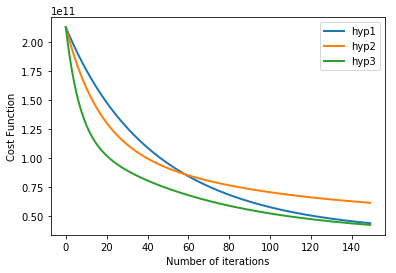

In [328]:

pyplot.figure()
pyplot.plot(np.arange(len(J_history11)), J_history1, lw=2, label='hyp1')
pyplot.plot(np.arange(len(J_history21)), J_history2, lw=2, label='hyp2')
pyplot.plot(np.arange(len(J_history31)), J_history3, lw=2, label='hyp3')
pyplot.legend()
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost Function')
pyplot.show()




('Computed mean:', array([3.36893653e+00, 2.11498419e+00, 2.07538027e+03, 1.51333626e+04,
       1.49182540e+00]))
('Computed standard deviation:', array([9.46270279e-01, 7.66545654e-01, 9.14061308e+02, 4.23817983e+04,
       5.41743520e-01]))
Cost at theta1 (zeros): 211163121710.303
Cost at theta1 (zeros): 211163121710.303
Cost at theta1 (zeros): 211163121710.303
[391177.13615697174 3238.487246414334 -7716.143350568318
 -36487.04524175457 26918.869099320396 3404.4132938156454]
[212872792516.78488, 198718724447.23462, 186371186137.34454, 175580659933.8016, 166132428961.68912, 157841717420.4954, 150549509623.10666, 144118952976.6804, 138432263345.38443, 133388062626.6823, 128899088173.42406, 124890222125.67857, 121296795970.30142, 118063131887.03938, 115141287809.1602, 112489977745.80656, 110073642887.36646, 107861652434.10155, 105827616029.7765, 103948792212.57735, 102205579472.84276, 100581078380.13419, 99060714853.63614, 97631916036.30402, 96283831425.81915, 95007092941.65425, 937936

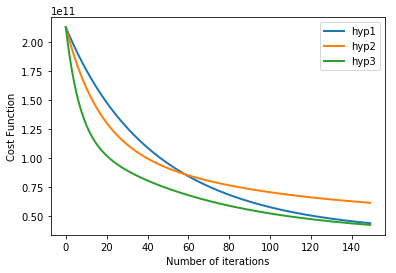

('Computed mean:', array([3.37009331e+00, 2.11648801e+00, 2.08242847e+03, 1.52212169e+04,
       1.49537287e+00]))
('Computed standard deviation:', array([9.47732626e-01, 7.77086390e-01, 9.32797277e+02, 4.35711665e+04,
       5.41856599e-01]))
Cost at theta1 (zeros): 216056718709.347
Cost at theta1 (zeros): 216056718709.347
Cost at theta1 (zeros): 216056718709.347
[392200.36038959544 4738.237217397305 -7584.378451969953
 -33972.256845590986 26817.673235251415 2259.0615774097605]
[212872792516.78488, 198718724447.23462, 186371186137.34454, 175580659933.8016, 166132428961.68912, 157841717420.4954, 150549509623.10666, 144118952976.6804, 138432263345.38443, 133388062626.6823, 128899088173.42406, 124890222125.67857, 121296795970.30142, 118063131887.03938, 115141287809.1602, 112489977745.80656, 110073642887.36646, 107861652434.10155, 105827616029.7765, 103948792212.57735, 102205579472.84276, 100581078380.13419, 99060714853.63614, 97631916036.30402, 96283831425.81915, 95007092941.65425, 93793

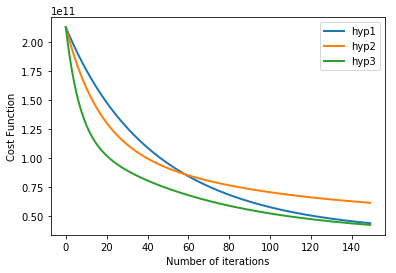

('Computed mean:', array([3.36284414e+00, 2.11253567e+00, 2.07428920e+03, 1.46299082e+04,
       1.49109277e+00]))
('Computed standard deviation:', array([9.00537457e-01, 7.64059744e-01, 9.09244904e+02, 3.92217115e+04,
       5.36923909e-01]))
Cost at theta1 (zeros): 207735981735.868
Cost at theta1 (zeros): 207735981735.868
Cost at theta1 (zeros): 207735981735.868
[389923.4757383209 9410.866577509483 -5359.8580774967 -34718.78375604487
 25611.261464918312 2443.947441577904]
[212872792516.78488, 198718724447.23462, 186371186137.34454, 175580659933.8016, 166132428961.68912, 157841717420.4954, 150549509623.10666, 144118952976.6804, 138432263345.38443, 133388062626.6823, 128899088173.42406, 124890222125.67857, 121296795970.30142, 118063131887.03938, 115141287809.1602, 112489977745.80656, 110073642887.36646, 107861652434.10155, 105827616029.7765, 103948792212.57735, 102205579472.84276, 100581078380.13419, 99060714853.63614, 97631916036.30402, 96283831425.81915, 95007092941.65425, 9379360849

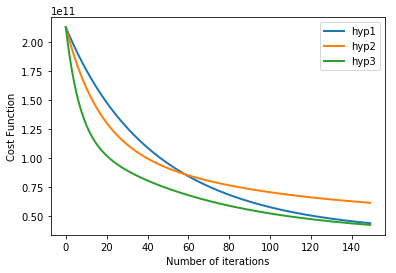

In [332]:
for t in range(3):
    train, CV, test = np.split(df.sample(frac=1),[int(.6*len(df)),int(.8*len(df))])
#     m= train.values[:,2].size
    
    
    m= train.values[:,2].size
    mT = test.values[:,2].size
    mV = CV.values[:,2].size
    def featureNormalize(X):
        trainingMean = np.mean(X, axis=0)
        trainingSigma = np.std(X, axis=0)    
        trainingNorm = (X - trainingMean) / trainingSigma
        return trainingNorm, trainingMean, trainingSigma
    
    test = test.drop(columns=['price', 'date']).values
    test= test[:,1:6]
    testingNorm, testingMean, testingSigma = featureNormalize(test)
    test = np.concatenate([np.ones((mT, 1)), testingNorm], axis=1)

    CV = CV.drop(columns=['price', 'date']).values
    CV= CV[:,1:6]
    CVNorm, CVMean, CVSigma = featureNormalize(CV)
    CV = np.concatenate([np.ones((mV, 1)), CVNorm], axis=1)
    
    X = train.drop(columns=['price', 'date']).values
    X= X[:,1:6]
    
    trainingNorm, trainingMean, trainingSigma = featureNormalize(X)
    #X_norm, mu, sigma = featureNormalize(X)
    print('Computed mean:', trainingMean)
    print('Computed standard deviation:', trainingSigma)

    #y = train["bedrooms"]
    #m = y.size

    #X = np.stack([np.ones(m), X], axis=1)
    X = np.concatenate([np.ones((m, 1)), trainingNorm], axis=1)
    theta1 = np.zeros(X.shape[1])
    hyp1 = np.dot(X,theta1)
#     hyp2 = np.dot(np.power(X,2) , theta1)
    #hyp3 = np.dot(np.power(X,3) , theta1)

    q1 = X.copy()
    q1[:, 3] = np.power(q1[:, 5], 2)
    hyp2 = np.dot(q1 , theta1)
    
    u1 = X.copy()
    u1[:, 4] = np.power(u1[:, 3], 2)
    hyp3 = np.dot(u1 , theta1)
    
    hyp1Test = np.dot(X,theta1)
#     hyp2Test = np.dot(np.power(X,2) , theta1)
    #hyp3 = np.dot(np.power(X,3) , theta1)

    q2 = X.copy()
    q2[:, 3] = np.power(q2[:, 5], 2)
    hyp2Test = np.dot(q2 , theta1)
    
    u2 = X.copy()
    u2[:, 4] = np.power(u2[:, 3], 2)
    hyp3Test = np.dot(u2 , theta1)
    
    hyp1CV = np.dot(X,theta1)
#     hyp2Test = np.dot(np.power(X,2) , theta1)
    #hyp3 = np.dot(np.power(X,3) , theta1)

    q3 = X.copy()
    q3[:, 3] = np.power(q3[:, 5], 2)
    hyp2CV = np.dot(q3 , theta1)
    
    u3 = X.copy()
    u3[:, 4] = np.power(u3[:, 3], 2)
    hyp3CV = np.dot(u3 , theta1)
    
    y = train.values[:,2]
    yT = test[:,2]
    yV = CV[:,2]
    
    lambda1 = 0.05
#     lambda2 = 0.5
#     lambda3 = 0.05

    import numpy as np
    def computeCost1(theta, X, y, h, lambda1, m):
        J= np.dot((h - y), (h - y)) / (2 * m) + ((lambda1/(2 * m))* np.sum(np.dot(theta, theta)))
        return J
    def computeCost2(theta, test, yT, h, lambda1, mT):

        J= np.dot((h - yT), (h - yT)) / (2 * m) + ((lambda1/(2 * m))* np.sum(np.dot(theta, theta)))

    
    
        return J
    def computeCost3(theta, CV, yV, h, lambda1, mV):
        J= np.dot((h - y), (h - yV)) / (2 * m) + ((lambda1/(2 * m))* np.sum(np.dot(theta, theta)))
    
        return J

    
    CF11 = computeCost1(theta1, X, y, hyp1, lambda1, m)
    CF21 = computeCost1(theta1, q, y, hyp2, lambda1, m)
    CF31 = computeCost1(theta1, u, y, hyp3, lambda1, m)
    
    CF12 = computeCost2(theta1, X, y, hyp1, lambda1, m)
    CF22 = computeCost2(theta1, q2, y, hyp2, lambda1, m)
    CF32 = computeCost2(theta1, u2, y, hyp3, lambda1, m)
    
    CF13 = computeCost3(theta1, X, y, hyp1, lambda1, m)
    CF23 = computeCost3(theta1, q3, y, hyp2, lambda1, m)
    CF33 = computeCost3(theta1, u3, y, hyp3, lambda1, m)
    print('Cost at theta1 (zeros): {:.3f}'.format(CF31))
    print('Cost at theta1 (zeros): {:.3f}'.format(CF32))
    print('Cost at theta1 (zeros): {:.3f}'.format(CF33))
    
    def gradientDescent1(X, y, theta, alpha, num_iters):
       
        m = y.shape[0]  # number of training examples
        theta = theta.copy()
        J_history = []  
    
        
        for i in range(num_iters):
            alphabym=alpha/m
            hyp=np.dot(X,theta)
            #theta=theta-((alpha/m)*(np.dot(X.T,hyp-y)))
            theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, hyp - y)))
    
            # save the cost J in every iteration
            J_history.append(computeCost(theta, X, y, hyp, lambda1, m))
    
        return theta, J_history
    def gradientDescent2(X, y, theta, alpha, num_iters):   
        m = y.shape[0]  # number of training examples
        theta = theta.copy()
        J_history = []  
        for i in range(num_iters):
            alphabym=alpha/m
            hyp=np.dot(X,theta)
            #theta=theta-((alpha/m)*(np.dot(X.T,hyp-y)))
            theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, hyp - y)))
            # save the cost J in every iteration
            J_history.append(computeCost(theta, X, y, hyp, lambda1, m))
        return theta, J_history
    def gradientDescent3(X, y, theta, alpha, num_iters):
        m = y.shape[0]  # number of training examples
        theta = theta.copy()
        J_history = []  
        for i in range(num_iters):
            alphabym=alpha/m
            hyp=np.dot(X,theta)
            #theta=theta-((alpha/m)*(np.dot(X.T,hyp-y)))
            theta = theta*(1 - (alpha*lambda1)/m) - ((alpha / m) * (np.dot(X.T, hyp - y)))
            # save the cost J in every iteration
            J_history.append(computeCost(theta, X, y, hyp, lambda1, m)) 
        return theta, J_history
    
    
    iterations = 150
    alpha1 = 0.01
    theta, J_history11 = gradientDescent1(X,y, theta1, alpha1, iterations)
    theta2, J_history21 = gradientDescent2(q,y, theta1, alpha1, iterations)
    theta3, J_history31 = gradientDescent3(u,y, theta1, alpha1, iterations)
    print(theta3)
    print(J_history3)
    
    pyplot.figure()
    pyplot.plot(np.arange(len(J_history11)), J_history1, lw=2, label='hyp1')
    pyplot.plot(np.arange(len(J_history21)), J_history2, lw=2, label='hyp2')
    pyplot.plot(np.arange(len(J_history31)), J_history3, lw=2, label='hyp3')
    pyplot.legend()
    pyplot.xlabel('Number of iterations')
    pyplot.ylabel('Cost Function')
    pyplot.show()

